In [33]:
# pip install -U kaleido

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from scipy.spatial import KDTree
import numpy as np

# Additional imports
import pystac_client
import xarray as xr
import pathlib
import os
import geopandas as gpd
import matplotlib as mpl
from matplotlib import colors
import rasterio

import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
from rasterio.plot import show

import matplotlib.colors as mcolors
from shapely.geometry import Point
import pandas as pd

from tqdm import tqdm

import webbrowser
from pathlib import Path
import os
import time

from itertools import compress
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

from tqdm import tqdm

from shapely.geometry import box



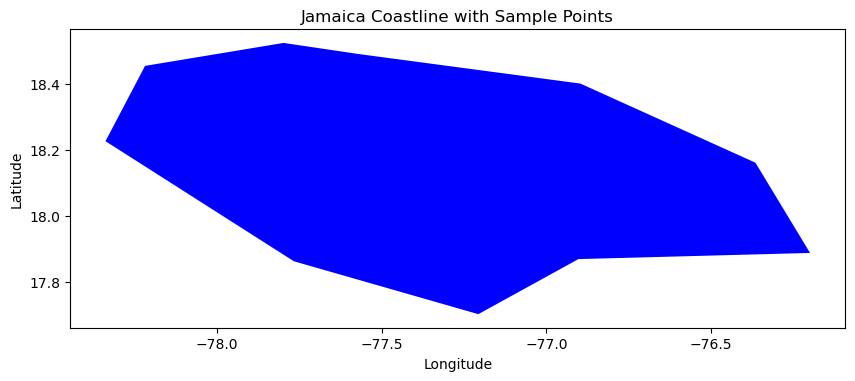

In [35]:

# Load the world dataset which includes country boundaries and coastlines
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Extract the coastline for Jamaica
jamaica_coastline = world[world['name'] == 'Jamaica']['geometry'].unary_union

# Check if it's a MultiLineString, if so, convert to LineString
if jamaica_coastline.geom_type == 'MultiLineString':
    jamaica_coastline = jamaica_coastline[0]

# Save the LineString to a GeoDataFrame
jamaica_coastline_gdf = gpd.GeoDataFrame(geometry=[jamaica_coastline], crs=world.crs)

# Visualize or process the Jamaica coastline
# Plot both the coastline and the points
ax = jamaica_coastline_gdf.plot(color='blue', figsize=(10, 8))

ax.set_title('Jamaica Coastline with Sample Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')

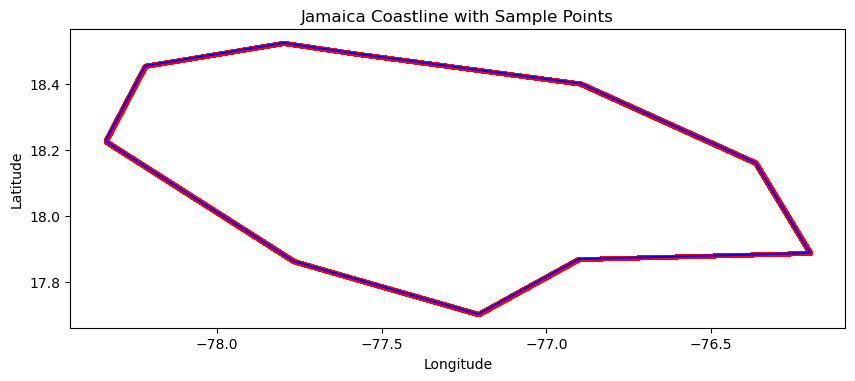

In [36]:
import geopandas as gpd
from shapely.geometry import Point, LineString

# Load the GeoDataFrame containing the Jamaica coastline Polygon
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
jamaica_coastline_polygon = world[world['name'] == 'Jamaica']['geometry'].unary_union
if jamaica_coastline_polygon.geom_type == 'MultiPolygon':
    jamaica_coastline_polygon = jamaica_coastline_polygon[0]  # Assuming only one polygon
jamaica_coastline = jamaica_coastline_polygon.exterior  # Extract exterior boundary
jamaica_coastline_gdf = gpd.GeoDataFrame(geometry=[jamaica_coastline], crs=world.crs)

# Create sample points along the coastline
points = []
distance_along_line = 0
while distance_along_line < jamaica_coastline.length:
    point = jamaica_coastline.interpolate(distance_along_line)
    points.append(point)
    distance_along_line += 0.0001  # 100 meters spacing
points_gdf = gpd.GeoDataFrame(geometry=points, crs=world.crs)

# Plot both the coastline and the points
ax = jamaica_coastline_gdf.plot(color='blue', figsize=(10, 8))
points_gdf.plot(ax=ax, color='red', markersize=5)
ax.set_title('Jamaica Coastline with Sample Points')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_aspect('equal')



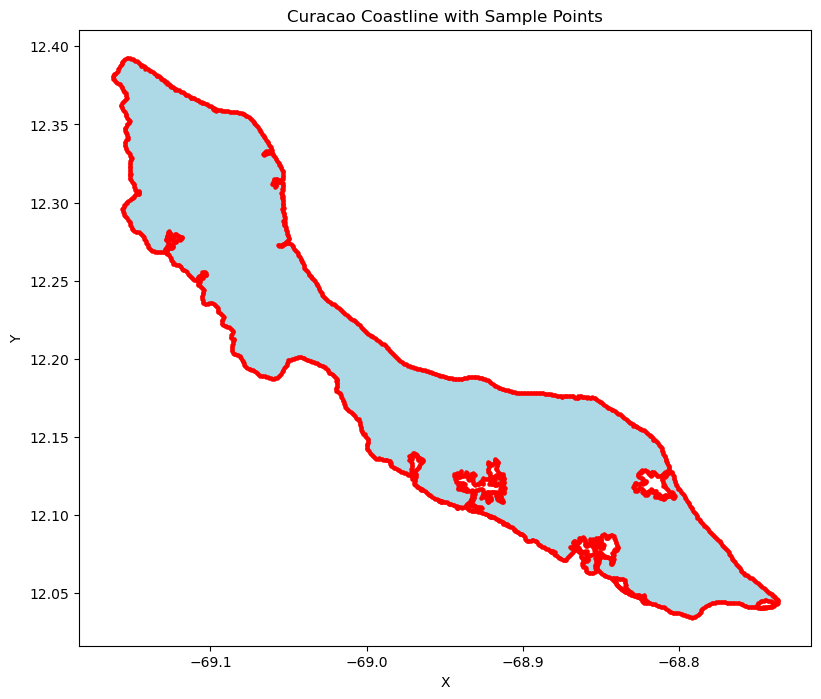

In [37]:
import geopandas as gpd
from shapely.geometry import MultiPolygon, LineString

# Load the GeoDataFrame containing the polygon from the GeoPackage file
polygon_gdf = gpd.read_file(r'P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\All_Datasets\Orig_Datasets\04_Auxillary_files\Curacao_Polygon.gpkg')
polygon_gdf=polygon_gdf.to_crs(crs="EPSG:4326")

# Merge all geometries into a single MultiPolygon
multi_polygon = polygon_gdf['geometry'].unary_union

# Convert the MultiPolygon to a LineString representing the coastline
coastline_line = LineString(multi_polygon.boundary.coords)

# Create sample points along the coastline
points = []
distance_along_line = 0
while distance_along_line < coastline_line.length:
    point = coastline_line.interpolate(distance_along_line)
    points.append(point)
    distance_along_line += 0.001  # 100 meters spacing

# Create a GeoDataFrame for the points
points_gdf = gpd.GeoDataFrame(geometry=points, crs=polygon_gdf.crs)

# Plot both the coastline and the points
ax = polygon_gdf.plot(color='lightblue', figsize=(10, 8))
points_gdf.plot(ax=ax, color='red', markersize=5)
ax.set_title('Curacao Coastline with Sample Points')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_aspect('equal')


In [38]:
points_gdf.index

RangeIndex(start=0, stop=2440, step=1)

In [39]:
print("Length of coastline LineString:", coastline_line.length)
print("Number of generated points:", len(points))
points_gdf["distance"]=points_gdf.index*100
points_gdf

Length of coastline LineString: 2.439015453209153
Number of generated points: 2440


,geometry,distance
0,POINT (-68.84834 12.06170),0
1,POINT (-68.84912 12.06225),100
2,POINT (-68.84990 12.06286),200
3,POINT (-68.85070 12.06346),300
4,POINT (-68.85136 12.06419),400
...,...,...
2435,POINT (-68.84468 12.06005),243500
2436,POINT (-68.84559 12.06048),243600
2437,POINT (-68.84652 12.06084),243700
2438,POINT (-68.84744 12.06124),243800


In [40]:
check_distance=0.01
# buffer_circles = gpd.GeoDataFrame([Polygon(p.buffer(check_distance)) for p in circle_center[0][:5]])
buffer_circles = gpd.GeoDataFrame({'geometry': [Polygon(p.buffer(check_distance)) for p in points_gdf['geometry']]})

In [41]:
circle_center=points_gdf


Loading ESL- PC

In [42]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_Sea_level\Netherland_Antilles_ESL.csv")
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Intersect_lon, df.Intersect_lat), crs="EPSG:4326"
)
data_points

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,...,sampled points,ESL_RCP0.0_Time_Horizon2000,ESL_RCP0.0_Time_Horizon2050,ESL_RCP0.0_Time_Horizon2100,ESL_RCP4.5_Time_Horizon2000,ESL_RCP4.5_Time_Horizon2050,ESL_RCP4.5_Time_Horizon2100,ESL_RCP8.5_Time_Horizon2000,ESL_RCP8.5_Time_Horizon2050,ESL_RCP8.5_Time_Horizon2100
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,...,8.0,0.868502,0.868502,0.868502,0.868502,1.104287,1.438144,0.868502,1.160029,1.771167
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,...,8.0,0.868502,0.868502,0.868502,0.868502,1.104287,1.438144,0.868502,1.160029,1.771167
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,...,9.0,0.868502,0.868502,0.868502,0.868502,1.104287,1.438144,0.868502,1.160029,1.771167
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,...,9.0,0.868502,0.868502,0.868502,0.868502,1.104287,1.438144,0.868502,1.160029,1.771167
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,...,9.0,0.868502,0.868502,0.868502,0.868502,1.104287,1.438144,0.868502,1.160029,1.771167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,...,10.0,0.868502,0.868502,0.868502,0.868502,1.104287,1.438144,0.868502,1.160029,1.771167
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,...,10.0,0.868502,0.868502,0.868502,0.868502,1.104287,1.438144,0.868502,1.160029,1.771167
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,...,10.0,0.868502,0.868502,0.868502,0.868502,1.104287,1.438144,0.868502,1.160029,1.771167
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,...,10.0,0.868502,0.868502,0.868502,0.868502,1.104287,1.438144,0.868502,1.160029,1.771167


In [43]:

import warnings
column_name_="ESL_RCP0.0_Time_Horizon2000"	
column_name_legend="ESL_RCP0.0_Time_Horizon2000"	


# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points[data_points.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
    inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

    # Sort inside_points by 'distance' in ascending order
    sorted_inside_points = inside_points.sort_values(by='distance')

    # Select the top 2 rows
    nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
            circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,column_name_legend]=np.nan
            continue
    
    if len(inside_points['geometry'])>0:
        circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,column_name_legend]=nearest_point[column_name_].values
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 2440/2440 [01:58<00:00, 20.66it/s]


,geometry,distance,sampled points,ESL_RCP0.0_Time_Horizon2000
0,POINT (-68.84834 12.06170),0,4.0,0.869869
1,POINT (-68.84912 12.06225),100,4.0,0.869869
2,POINT (-68.84990 12.06286),200,4.0,0.869869
3,POINT (-68.85070 12.06346),300,4.0,0.869869
4,POINT (-68.85136 12.06419),400,4.0,0.869869
...,...,...,...,...
2435,POINT (-68.84468 12.06005),243500,4.0,0.869869
2436,POINT (-68.84559 12.06048),243600,4.0,0.869869
2437,POINT (-68.84652 12.06084),243700,4.0,0.869869
2438,POINT (-68.84744 12.06124),243800,4.0,0.869869


Loading Extreme Wave Height

In [44]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Extreme_wave_height\merged_netherland_antilles.csv")
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Intersect_lon, df.Intersect_lat), crs="EPSG:4326"
)
data_points

,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Lat_ERA5,Lon_ERA5,Lat_Lon,unique_points,unique_hs,geometry
0,BOX_117_121_0,NLD,Europe,Netherlands,-68.395427,12.295109,-68.401033,12.301967,-68.406639,12.308825,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.957314,POINT (-68.40103 12.30197)
1,BOX_117_121_1,NLD,Europe,Netherlands,-68.398505,12.292725,-68.404540,12.299226,-68.410576,12.305726,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.957314,POINT (-68.40454 12.29923)
2,BOX_117_121_2,NLD,Europe,Netherlands,-68.401179,12.289979,-68.407654,12.296063,-68.414129,12.302147,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.957314,POINT (-68.40765 12.29606)
3,BOX_117_121_3,NLD,Europe,Netherlands,-68.402839,12.287514,-68.410244,12.292483,-68.417649,12.297452,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.957314,POINT (-68.41024 12.29248)
4,BOX_117_121_4,NLD,Europe,Netherlands,-68.403989,12.284926,-68.412179,12.288531,-68.420369,12.292136,12.5,291.5,"(12.5, 291.5)","(12.5, 291.5)",1.957314,POINT (-68.41218 12.28853)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
618,BOX_117_117_139,NLD,Europe,Netherlands,-68.301764,12.158128,-68.300464,12.166817,-68.299164,12.175506,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702017,POINT (-68.30046 12.16682)
619,BOX_117_117_140,NLD,Europe,Netherlands,-68.306208,12.158764,-68.304908,12.167453,-68.303608,12.176142,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702017,POINT (-68.30491 12.16745)
620,BOX_117_117_141,NLD,Europe,Netherlands,-68.309252,12.158884,-68.309381,12.167664,-68.309510,12.176445,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702017,POINT (-68.30938 12.16766)
621,BOX_117_117_142,NLD,Europe,Netherlands,-68.313743,12.158821,-68.313872,12.167601,-68.314001,12.176382,12.0,291.5,"(12.0, 291.5)","(12.0, 291.5)",1.702017,POINT (-68.31387 12.16760)


In [45]:

import warnings
column_name_="unique_hs"	
column_name_legend="Sig. WaveHeight 95th percentile"	


# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points[data_points.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
    inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

    # Sort inside_points by 'distance' in ascending order
    sorted_inside_points = inside_points.sort_values(by='distance')

    # Select the top 2 rows
    nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
            circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,column_name_legend]=np.nan
            continue
    
    if len(inside_points['geometry'])>0:
        circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,column_name_legend]=nearest_point[column_name_].values
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 2440/2440 [01:54<00:00, 21.24it/s]


,geometry,distance,sampled points,ESL_RCP0.0_Time_Horizon2000,Sig. WaveHeight 95th percentile
0,POINT (-68.84834 12.06170),0,4.0,0.869869,1.695959
1,POINT (-68.84912 12.06225),100,4.0,0.869869,1.695959
2,POINT (-68.84990 12.06286),200,4.0,0.869869,1.695959
3,POINT (-68.85070 12.06346),300,4.0,0.869869,1.695959
4,POINT (-68.85136 12.06419),400,4.0,0.869869,1.695959
...,...,...,...,...,...
2435,POINT (-68.84468 12.06005),243500,4.0,0.869869,1.695959
2436,POINT (-68.84559 12.06048),243600,4.0,0.869869,1.695959
2437,POINT (-68.84652 12.06084),243700,4.0,0.869869,1.695959
2438,POINT (-68.84744 12.06124),243800,4.0,0.869869,1.695959


Loading Global Erosion_Rates

In [46]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Shoreline_Change\Global_Erosion_rate_PC.csv")


data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.lon, df.lat), crs="EPSG:4326"
)
data_points


,changerate,changerate_unc,coastline_idint,continent,country,country_id,err_changerate,err_timespan,intercept,intercept_unc,...,no_shorelines,outliers,rmse,sandy,sp,time,timespan,transect_geom,transect_id,geometry
0,14.088576,1.503763,5389.0,b'South America',b'Chile',b'CHL',1.0,1.0,56.678813,35.137902,...,8.0,0.0,23.620801,1,NaN,1984-01-01,21.0,"b'LINESTRING (-74.3863095545 -50.3776589451, -...",b'BOX_028_183_0',POINT (-74.38631 -50.37766)
1,6.937372,7.717642,5389.0,b'South America',b'Chile',b'CHL',1.0,1.0,297.416535,196.569308,...,13.0,1.0,157.453404,0,414.190582,1984-01-01,21.0,"b'LINESTRING (-74.382468591 -50.3791437735, -7...",b'BOX_028_183_1',POINT (-74.38247 -50.37914)
2,2.430833,1.637254,5389.0,b'South America',b'Chile',b'CHL',1.0,1.0,282.545984,41.701053,...,14.0,1.0,33.402840,0,367.236267,1984-01-01,21.0,"b'LINESTRING (-74.3786276274 -50.3806285554, -...",b'BOX_028_183_2',POINT (-74.37863 -50.38063)
3,4.427241,10.685796,5389.0,b'South America',b'Chile',b'CHL',1.0,1.0,212.780267,278.138758,...,15.0,1.0,208.282579,0,484.592266,1984-01-01,21.0,b'LINESTRING (-74.3739502728 -50.3825830980000...,b'BOX_028_183_3',POINT (-74.37395 -50.38258)
4,4.002978,10.248722,5389.0,b'South America',b'Chile',b'CHL',1.0,1.0,271.142825,255.122503,...,16.0,0.0,308.598295,0,393.579932,1984-01-01,35.0,"b'LINESTRING (-74.3704249118 -50.3843577821, -...",b'BOX_028_183_4',POINT (-74.37042 -50.38436)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837198,12.993559,2.265287,17612.0,b'Europe',b'Russia',b'RUS',1.0,1.0,21.928761,45.436937,...,36.0,1.0,116.339704,0,284.891489,1984-01-01,36.0,"b'LINESTRING (39.9299368881 64.7014617708, 39....",b'BOX_211_067_149',POINT (39.92994 64.70146)
1837199,8.107627,2.017299,17612.0,b'Europe',b'Russia',b'RUS',1.0,1.0,196.397698,44.916515,...,36.0,1.0,99.278079,0,190.727131,1984-01-01,34.0,"b'LINESTRING (39.9335774372 64.7025859435, 39....",b'BOX_211_067_150',POINT (39.93358 64.70259)
1837200,1.779037,0.154548,17612.0,b'Europe',b'Russia',b'RUS',1.0,1.0,503.516226,3.161074,...,36.0,0.0,8.878198,0,-6.202073,1984-01-01,36.0,"b'LINESTRING (39.9355464131 64.7035022455, 39....",b'BOX_211_067_151',POINT (39.93555 64.70350)
1837201,5.909214,1.087255,17612.0,b'Europe',b'Russia',b'RUS',1.0,1.0,308.861385,21.631230,...,36.0,0.0,60.132336,0,23.640587,1984-01-01,36.0,"b'LINESTRING (39.9370502292 64.7043704327, 39....",b'BOX_211_067_152',POINT (39.93705 64.70437)


In [47]:

import warnings
column_name_="changerate"	
column_name_legend="Shoreline change_rate"	

# because large scale data is being used, filter only for points in extent
# Extract bounding box coordinates
xmin, ymin, xmax, ymax = buffer_circles.total_bounds
# Create a bounding box polygon
bbox = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])
# Filter data points within the bounding box
data_points = data_points[data_points.geometry.within(bbox)]

# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points[data_points.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
    inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

    # Sort inside_points by 'distance' in ascending order
    sorted_inside_points = inside_points.sort_values(by='distance')

    # Select the top 2 rows
    nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
            circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,column_name_legend]=np.nan
            continue
    
    if len(inside_points['geometry'])>0:
        circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,column_name_legend]=nearest_point[column_name_].values
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 2440/2440 [01:55<00:00, 21.14it/s]


,geometry,distance,sampled points,ESL_RCP0.0_Time_Horizon2000,Sig. WaveHeight 95th percentile,Shoreline change_rate
0,POINT (-68.84834 12.06170),0,0.0,0.869869,1.695959,NaN
1,POINT (-68.84912 12.06225),100,0.0,0.869869,1.695959,NaN
2,POINT (-68.84990 12.06286),200,0.0,0.869869,1.695959,NaN
3,POINT (-68.85070 12.06346),300,0.0,0.869869,1.695959,NaN
4,POINT (-68.85136 12.06419),400,0.0,0.869869,1.695959,NaN
...,...,...,...,...,...,...
2435,POINT (-68.84468 12.06005),243500,1.0,0.869869,1.695959,-0.218747
2436,POINT (-68.84559 12.06048),243600,1.0,0.869869,1.695959,-0.218747
2437,POINT (-68.84652 12.06084),243700,1.0,0.869869,1.695959,-0.218747
2438,POINT (-68.84744 12.06124),243800,1.0,0.869869,1.695959,-0.218747


Land Subsidence?

In [48]:
df=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data\01_Hazards\01_Present\Land_Subsidence\jamaica.csv")
data_points = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Intersect_lon, df.Intersect_lat), crs="EPSG:4326"
)
data_points


,transect_id,country_id,continent,country_name,Start_lon,Start_lat,Intersect_lon,Intersect_lat,End_lon,End_lat,Land_sub,geometry
0,BOX_138_171_0,JAM,North America,Jamaica,-76.638993,18.218933,-76.638419,18.227448,-76.637845,18.235963,NaN,POINT (-76.63842 18.22745)
1,BOX_138_171_1,JAM,North America,Jamaica,-76.645607,18.220463,-76.642730,18.228546,-76.639853,18.236629,NaN,POINT (-76.64273 18.22855)
2,BOX_138_171_2,JAM,North America,Jamaica,-76.651760,18.223250,-76.646763,18.230341,-76.641766,18.237431,NaN,POINT (-76.64676 18.23034)
3,BOX_138_171_3,JAM,North America,Jamaica,-76.655492,18.225623,-76.650495,18.232714,-76.645498,18.239804,NaN,POINT (-76.65050 18.23271)
4,BOX_138_171_4,JAM,North America,Jamaica,-76.660223,18.228769,-76.654210,18.235108,-76.648197,18.241447,NaN,POINT (-76.65421 18.23511)
...,...,...,...,...,...,...,...,...,...,...,...,...
1302,BOX_138_167_49,JAM,North America,Jamaica,-76.560530,18.194318,-76.559530,18.202799,-76.558530,18.211279,NaN,POINT (-76.55953 18.20280)
1303,BOX_138_167_50,JAM,North America,Jamaica,-76.565863,18.195194,-76.563949,18.203532,-76.562035,18.211869,NaN,POINT (-76.56395 18.20353)
1304,BOX_138_167_51,JAM,North America,Jamaica,-76.571400,18.196737,-76.568248,18.204728,-76.565096,18.212719,NaN,POINT (-76.56825 18.20473)
1305,BOX_138_167_52,JAM,North America,Jamaica,-76.576882,18.199248,-76.572277,18.206575,-76.567672,18.213902,NaN,POINT (-76.57228 18.20658)


In [49]:

import warnings
column_name_="Land_sub"	
column_name_legend="Land_Subsidence"	

# because large scale data is being used, filter only for points in extent
# Extract bounding box coordinates
xmin, ymin, xmax, ymax = buffer_circles.total_bounds
# Create a bounding box polygon
bbox = Polygon([(xmin, ymin), (xmax, ymin), (xmax, ymax), (xmin, ymax)])
# Filter data points within the bounding box
data_points = data_points[data_points.geometry.within(bbox)]

# Suppress all warnings
warnings.filterwarnings("ignore")

for i in tqdm(range(0,len(buffer_circles['geometry'])),desc="Transects checked"):
    #inside_points = data_points[data_points.within(buffer_circles.iloc[i]['geometry'])]
    inside_points = data_points[data_points.within(buffer_circles.loc[i,'geometry'])]
    
    # Calculate distance
   
    inside_points.loc[:,'distance'] = inside_points.geometry.distance(circle_center.geometry[i])

    # Sort inside_points by 'distance' in ascending order
    sorted_inside_points = inside_points.sort_values(by='distance')

    # Select the top 2 rows
    nearest_point = sorted_inside_points.head(1)

    if len(inside_points['geometry'])==0:
            circle_center.loc[i,'sampled points']=0
            circle_center.loc[i,column_name_legend]=np.nan
            continue
    
    if len(inside_points['geometry'])>0:
        circle_center.loc[i,'sampled points']=len(inside_points['geometry'])
        circle_center.loc[i,column_name_legend]=nearest_point[column_name_].values
        continue
# Suppress all warnings
warnings.filterwarnings("ignore")
circle_center

Transects checked: 100%|██████████| 2440/2440 [01:52<00:00, 21.64it/s]


,geometry,distance,sampled points,ESL_RCP0.0_Time_Horizon2000,Sig. WaveHeight 95th percentile,Shoreline change_rate,Land_Subsidence
0,POINT (-68.84834 12.06170),0,0.0,0.869869,1.695959,NaN,NaN
1,POINT (-68.84912 12.06225),100,0.0,0.869869,1.695959,NaN,NaN
2,POINT (-68.84990 12.06286),200,0.0,0.869869,1.695959,NaN,NaN
3,POINT (-68.85070 12.06346),300,0.0,0.869869,1.695959,NaN,NaN
4,POINT (-68.85136 12.06419),400,0.0,0.869869,1.695959,NaN,NaN
...,...,...,...,...,...,...,...
2435,POINT (-68.84468 12.06005),243500,0.0,0.869869,1.695959,-0.218747,NaN
2436,POINT (-68.84559 12.06048),243600,0.0,0.869869,1.695959,-0.218747,NaN
2437,POINT (-68.84652 12.06084),243700,0.0,0.869869,1.695959,-0.218747,NaN
2438,POINT (-68.84744 12.06124),243800,0.0,0.869869,1.695959,-0.218747,NaN


Saving Final raw Hazard indicator Values

In [50]:
# circle_center_saved=circle_center
# circle_center_saved.to_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Hazard\Present\Curacao_Hazards.csv",index=False)


In [15]:
# Read the CSV file into a DataFrame
circle_center_df = pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Hazard\Present\Curacao_Hazards.csv")


# Identify the correct geometry column (replace 'geometry_column_name' with the actual column name)
geometry_column_name = 'geometry'
circle_center_df['x'] = circle_center_df[geometry_column_name].apply(lambda point_str: float(point_str.strip('POINT ()').split()[0]))
circle_center_df['y'] = circle_center_df[geometry_column_name].apply(lambda point_str: float(point_str.strip('POINT ()').split()[1]))

circle_center_df = circle_center_df.drop(columns=[geometry_column_name])

# Create the GeoDataFrame with the correct geometry column
circle_center = gpd.GeoDataFrame(circle_center_df, geometry=gpd.points_from_xy(circle_center_df.x, circle_center_df.y))



# Slice the DataFrame to exclude 'geometry', 'x', and 'y' columns
other_columns = circle_center.iloc[:, 0:-3]

# Concatenate the 'geometry' column with the other columns
circle_center2 = gpd.GeoDataFrame(geometry=circle_center.geometry, data=other_columns)


circle_center=circle_center2
circle_center

,distance,sampled points,ESL_RCP0.0_Time_Horizon2000,Sig. WaveHeight 95th percentile,Shoreline change_rate,Land_Subsidence,geometry
0,0,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84834 12.06170)
1,100,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84912 12.06225)
2,200,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84990 12.06286)
3,300,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.85070 12.06346)
4,400,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.85136 12.06419)
...,...,...,...,...,...,...,...
2435,243500,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84468 12.06005)
2436,243600,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84559 12.06048)
2437,243700,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84652 12.06084)
2438,243800,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84744 12.06124)


In [16]:
isinstance(circle_center, gpd.GeoDataFrame)

True

In [17]:
fig2 = go.Figure(go.Scattermapbox(
    lat=circle_center["geometry"].y,
    lon=circle_center["geometry"].x,
    mode='markers',
    marker=dict(
        size=15,
        color=circle_center["distance"],  # Set color to red

        # colorscale=color_scale,  # Specify the discrete color scale
        # cmin=1,  # Set the minimum value for the color scale
        # cmax=6,  # Set the maximum value for the color scale
        colorbar=dict(
            # title=f'Curacao chainage starting counterclockwise from lon= {circle_center["geometry"][0].x:.2f} and lat= {circle_center["geometry"][0].y:.2f}'  # Set color bar title?
            title = (
                        f'Curacao along-shoreline chainage <br> (meters)'
                    )            
        )
    ),
    hoverinfo='text',
    hovertext=circle_center["distance"],
    showlegend=False
))

# Update layout properties
fig2.update_layout(
    title = f"Curacao Transect Chainage at 100m spacing starting counterclockwise from:<br> Point lon={circle_center['geometry'][0].x:.2f}° and lat={circle_center['geometry'][0].y:.2f}°",
    mapbox_style="carto-positron",
    mapbox=dict(
        zoom=9.5,
        center=dict(lat=12.18625, lon=-68.95)
    ),		

    margin=dict(l=0, r=50, b=0, t=100),
    legend=dict(
    x=1.15,
    y=1.0,
    traceorder="normal",
    orientation="v"
),
    width=800,  # Set width of the plot
    height=600  # Set height of the plot
)

# Show the plot
fig2.show()
directory_path = r"C:\Users\rowe\Documents\GitHub\global-coastal-atlas\STAC\visualization\SOTC_transect_mapping_visual\Plots\Poster"
# pio.write_image(fig2, os.path.join(directory_path, "Curacao chainage.png"))

In [18]:
circle_center

,distance,sampled points,ESL_RCP0.0_Time_Horizon2000,Sig. WaveHeight 95th percentile,Shoreline change_rate,Land_Subsidence,geometry
0,0,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84834 12.06170)
1,100,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84912 12.06225)
2,200,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84990 12.06286)
3,300,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.85070 12.06346)
4,400,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.85136 12.06419)
...,...,...,...,...,...,...,...
2435,243500,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84468 12.06005)
2436,243600,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84559 12.06048)
2437,243700,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84652 12.06084)
2438,243800,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84744 12.06124)


In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

circle_center_final_export=circle_center

# # in the case of *DIRECTLY* proportional variable increase to proportional exposure level increase
# #eg wave heaight higher Hs the Higher the risk


# in the case of *INVERSELY *proportional variable increase to proportional exposure level increase
#eg Nearshore slope : higher tanB(m) the lower the risk
inverse_map=[False,False,True,False]
short_name= ["Extreme Sea Level - PC","Sig. WaveHeight 95th% - PC","Shoreline change rate - PC","Land Subsidencee - PC"]

for i,col_num in enumerate(range(2,6)):
    # col_num=2

    distance_Exposure = pd.concat([circle_center.iloc[:, 0],circle_center.iloc[:, col_num]], axis=1)

    # Slice the DataFrame to exclude 'geometry', 'x', and 'y' columns
    other_columns = distance_Exposure 

    # Concatenate the 'geometry' column with the other columns
    circle_center_nans = gpd.GeoDataFrame(geometry=circle_center.geometry, data=other_columns)


    #STEP 2 KMEANS CLUSTERING

    inverse=inverse_map[i]


    color_scale = ['#33f510','#3CB371','#FFFF00', '#FFA500','#FF4500']


    # Create a new DataFrame without NaNs
    circle_center_nans = circle_center_nans.dropna().copy()

    if len(circle_center_nans.iloc[:,0])==0:
        print("no points for " + short_name[i])
        continue

    # Fit KMeans clustering to the 3rd column variables
    kmeans = KMeans(n_clusters=5, random_state=42)
    kmeans.fit(circle_center_nans.iloc[:, 1:2])   # Nearshore slope column

    # kmeans.cluster_centers_ = np.sort(kmeans.cluster_centers_, axis=0)

    # Add kmeans.labels_ as a new column to circle_center_nans
    long_name=short_name[i]+ " - Hazard level"
    circle_center_nans[long_name] = kmeans.labels_ + 1




    # STEP 3 Kmeans sometimes does not rank the clusters proportional ie in increasing order
    # So we have to manually check and re-sort/re-rank
   

    a=kmeans.cluster_centers_
    p = np.sort(a, axis=0)
    levels=np.array([1,2,3,4,5]).reshape(-1, 1)


    p = np.concatenate((p, a,levels), axis=1)
    kmeansissue = pd.DataFrame(p, columns=[f'Column_{i}' for i in range(p.shape[1])])
    kmeansissue['Rank'] = kmeansissue['Column_1'].rank(method='min')

    if inverse:
        # Define the mapping dictionary
        rank_mapping = {1: 5, 2: 4, 3: 3, 4: 2, 5: 1}

        # Map the ranks using the dictionary
        kmeansissue['Rank'] = kmeansissue['Rank'].map(rank_mapping)

     # REWRITE TO THE EXPOSURE LEVEL COLUMN
        

    # Map ranks to NS-Exposure level
    rank_to_exposure = kmeansissue.set_index('Column_2')['Rank'].to_dict()
    circle_center_nans[long_name] = circle_center_nans[long_name].map(rank_to_exposure).astype(int)





    point_colors = [color_scale[label] for label in circle_center_nans[long_name]-1]

    # Plot original data points with custom colors
    plt.scatter(circle_center_nans.iloc[:, 0], circle_center_nans.iloc[:, 1], c=point_colors, marker='x', label=long_name)

    # Plot cluster centroids
    plt.scatter((circle_center_nans.iloc[-1, 0]/2)*(kmeans.cluster_centers_[:, 0]/kmeans.cluster_centers_[:, 0]), kmeans.cluster_centers_[:, 0], s=120, c='red', marker='o', label='Cluster Centroids')

    # Add labels and legend
    plt.xlabel('Curacao Along-Shore Distance (m)')
    plt.ylabel(short_name[i])
    plt.title(short_name[i]+' vs Longshore Distance Scatter Plot')
    plt.legend()
    # plt.show()
    directory_path = r"C:\Users\rowe\Documents\GitHub\global-coastal-atlas\STAC\visualization\SOTC_transect_mapping_visual\Plots\Poster"
    fig_name_scatter=short_name[i]+' cluster_class_plot.png'
    plt.savefig(os.path.join(directory_path, fig_name_scatter)) 
    plt.close()


    #Create GPD circle_center_final with all the information of the different exposure levels
    circle_center_final=circle_center
    circle_center_final = circle_center_final.merge(circle_center_nans[['distance', long_name]], on='distance', how='left')
    circle_center_final


    # Create Shoreline plot showing each ranked exposure levels
    fig2 = go.Figure(go.Scattermapbox(
        lat=circle_center_final["geometry"].y,
        lon=circle_center_final["geometry"].x,
        mode='markers',
        marker=dict(
            size=15,
            color=circle_center_final[long_name],  # Set color to red
            colorscale=color_scale,  # Specify the discrete color scale

            # colorscale=color_scale,  # Specify the discrete color scale
            # cmin=1,  # Set the minimum value for the color scale
            # cmax=6,  # Set the maximum value for the color scale
            colorbar=dict(
                # title=f'Curacao chainage starting counterclockwise from lon= {circle_center["geometry"][0].x:.2f} and lat= {circle_center["geometry"][0].y:.2f}'  # Set color bar title?
                title = (
                            long_name
                        )            
            )
        ),
        hoverinfo='text',
        hovertext=circle_center_final[long_name],
        showlegend=False
    ))

    # Update layout properties
    fig2.update_layout(
        title = f"Curacao " + long_name +" at 100m spacing starting counterclockwise from:<br>" + f"Point lon={circle_center['geometry'][0].x:.2f}° and lat={circle_center['geometry'][0].y:.2f}°",
        mapbox_style="carto-positron",
        mapbox=dict(
            zoom=9.5,
            center=dict(lat=12.18625, lon=-68.95)
        ),		

        margin=dict(l=0, r=50, b=0, t=100),
        legend=dict(
        x=1.15,
        y=1.0,
        traceorder="normal",
        orientation="v"
    ),
        width=800,  # Set width of the plot
        height=600  # Set height of the plot
    )

    # Show the plot
    fig2.show()
    
    fig_name_shoreline=short_name[i]+' shoreline_plot.png'
    pio.write_image(fig2, os.path.join(directory_path, fig_name_shoreline))


    circle_center_final_export[long_name]= circle_center_final[long_name]

    del kmeans
 

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.



c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.



c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



no points for Land Subsidencee - PC


In [21]:
circle_center_final_export.to_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Hazard\Present\Curacao_Hazards_classified.csv",index=False)

In [22]:
circle_center_final_export_check=pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Hazard\Present\Curacao_Hazards_classified.csv")
circle_center_final_export_check

,distance,sampled points,ESL_RCP0.0_Time_Horizon2000,Sig. WaveHeight 95th percentile,Shoreline change_rate,Land_Subsidence,geometry,Extreme Sea Level - PC - Hazard level,Sig. WaveHeight 95th% - PC - Hazard level,Shoreline change rate - PC - Hazard level
0,0,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.8483397 12.061695899999998),2.0,1.0,NaN
1,100,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84911617380439 12.06224646915572),2.0,1.0,NaN
2,200,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84990212744901 12.062863188234783),2.0,1.0,NaN
3,300,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.85069884613627 12.063463122779966),2.0,1.0,NaN
4,400,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.85135637829056 12.064185009066897),2.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2435,243500,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84468462007678 12.060052302736732),2.0,1.0,3.0
2436,243600,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84558616670871 12.060483706569734),2.0,1.0,3.0
2437,243700,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84652050289856 12.060837534484437),2.0,1.0,3.0
2438,243800,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84743760359714 12.061236116783006),2.0,1.0,3.0


In [23]:
# #Min_Max Scaling


# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import MinMaxScaler

# plt.figure(figsize=(10, 6))  

# columns_to_scale = circle_center.columns[2:-1]  # Starting from the third column to the end
# circle_center_scaled=circle_center

# # Perform Min-Max scaling
# scaler = MinMaxScaler()
# circle_center_scaled[columns_to_scale] = scaler.fit_transform(circle_center_scaled[columns_to_scale])

# # Plotting the line graph using Seaborn
# for column in circle_center_scaled.columns[2:-1]:
#     sns.lineplot(data=circle_center_scaled, x='distance', y=column, label=column)

# plt.title(f'Curacao Indicator Variation Starting from {circle_center_scaled["geometry"][0]}')
# plt.xlabel('Coastline Distance')
# plt.ylabel('Indicator Variation')
# plt.grid(True)
# plt.show()

In [24]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# import numpy as np

# # plt.figure(figsize=(15, 6))

# columns_to_scale = circle_center.columns[2:-1]  # Starting from the third column to the end
# circle_center_scaled = circle_center.dropna().copy()

# # Select numerical columns only not geometry
# numeric_columns = circle_center.select_dtypes(include=np.number)

# # Replace NaN values with the minimum value of each respective column
# circle_center_filled = circle_center.copy()
# circle_center_filled[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.min())

# # Make a copy to avoid modifying the original DataFrame
# circle_center_scaled = circle_center_filled.copy()

# # Perform KMeans clustering-based scaling
# for column in columns_to_scale:
#     # Fit KMeans model
#     kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Explicitly set n_init
#     kmeans.fit(circle_center_scaled[[column]])
    
#     # Sort to ensure maximum value occurs
#     kmeans.cluster_centers_ = np.sort(kmeans.cluster_centers_, axis=0)

#     # Transform values based on cluster centroids
#     scaled_values = kmeans.transform(circle_center_scaled[[column]])
#     scaled_values = 1 + (scaled_values - kmeans.cluster_centers_.min()) / (kmeans.cluster_centers_.max() - kmeans.cluster_centers_.min()) * 4
#     circle_center_scaled[column] = scaled_values

# # Create figure and grid layout with two subplots
# fig, ax1 = plt.subplots(figsize=(15, 6))

# # Plot the line graph using Seaborn
# for column in circle_center_scaled.columns[2:-1]:
#     sns.lineplot(data=circle_center_scaled, x='distance', y=column, label=column, ax=ax1)

# # Add color bar along the x-axis
# cbar = plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=ax1, orientation='horizontal', aspect=50)
# cbar.set_ticks([])  # Remove color bar tick labels
# cbar.set_label('')  # Remove color bar label

# # Set title and labels for the line graph
# ax1.set_title(f'Curacao Exposure Indicator Variation Starting from {circle_center_scaled["geometry"][0]}')
# ax1.set_xlabel('Coastline Distance')
# ax1.set_ylabel('Exposure Indicator Variation')
# ax1.grid(True)
# ax1.set_xlim(circle_center_scaled['distance'].min(), circle_center_scaled['distance'].max())

# plt.tight_layout()  # Adjust layout to prevent overlap
# plt.show()


In [25]:
# Read the CSV file into a DataFrame
circle_center_df = pd.read_csv(r"P:\11209197-018-global-coastal-atlas\MSc_students\ClenmarRowe\Data\Processed_data_CVI_components\Hazard\Curacao_Hazards.csv")


# Identify the correct geometry column (replace 'geometry_column_name' with the actual column name)
geometry_column_name = 'geometry'
circle_center_df['x'] = circle_center_df[geometry_column_name].apply(lambda point_str: float(point_str.strip('POINT ()').split()[0]))
circle_center_df['y'] = circle_center_df[geometry_column_name].apply(lambda point_str: float(point_str.strip('POINT ()').split()[1]))

circle_center_df = circle_center_df.drop(columns=[geometry_column_name])

# Create the GeoDataFrame with the correct geometry column
circle_center = gpd.GeoDataFrame(circle_center_df, geometry=gpd.points_from_xy(circle_center_df.x, circle_center_df.y))



# Slice the DataFrame to exclude 'geometry', 'x', and 'y' columns
other_columns = circle_center.iloc[:, 0:-3]

# Concatenate the 'geometry' column with the other columns
circle_center2 = gpd.GeoDataFrame(geometry=circle_center.geometry, data=other_columns)


circle_center=circle_center2
circle_center

,distance,sampled points,ESL_RCP0.0_Time_Horizon2000,Sig. WaveHeight 95th percentile,Shoreline change_rate,Land_Subsidence,geometry
0,0,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84834 12.06170)
1,100,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84912 12.06225)
2,200,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.84990 12.06286)
3,300,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.85070 12.06346)
4,400,0.0,0.869869,1.695959,NaN,NaN,POINT (-68.85136 12.06419)
...,...,...,...,...,...,...,...
2435,243500,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84468 12.06005)
2436,243600,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84559 12.06048)
2437,243700,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84652 12.06084)
2438,243800,0.0,0.869869,1.695959,-0.218747,NaN,POINT (-68.84744 12.06124)


c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.

c:\Users\rowe\AppData\Local\miniconda3\envs\coclico\Lib\site-packages\sklearn\base.py:1152: ConvergenceWarning:

Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.

C:\Users\rowe\AppData\Local\Temp\ipykernel_14788\3879874385.py:58: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



[[0.86980227]
 [0.86986868]
 [0.86986868]
 [0.86986868]
 [0.89057158]]
[[6.64131030e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.07028983e-02]
 [6.64131030e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.07028983e-02]
 [6.64131030e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.07028983e-02]
 ...
 [6.64131030e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.07028983e-02]
 [6.64131030e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.07028983e-02]
 [6.64131030e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
  2.07028983e-02]]
[[1.01279062 1.         1.         1.         4.98720938]
 [1.01279062 1.         1.         1.         4.98720938]
 [1.01279062 1.         1.         1.         4.98720938]
 ...
 [1.01279062 1.         1.         1.         4.98720938]
 [1.01279062 1.         1.         1.         4.98720938]
 [1.01279062 1.         1.         1.         4.98720938]]
[[1.69595933]
 [1.69595933]
 [1.69595933]
 [1.70201683]
 [1.97993088]]
[[0.         0.   

C:\Users\rowe\AppData\Local\Temp\ipykernel_14788\3879874385.py:58: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\rowe\AppData\Local\Temp\ipykernel_14788\3879874385.py:58: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\rowe\AppData\Local\Temp\ipykernel_14788\3879874385.py:58: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



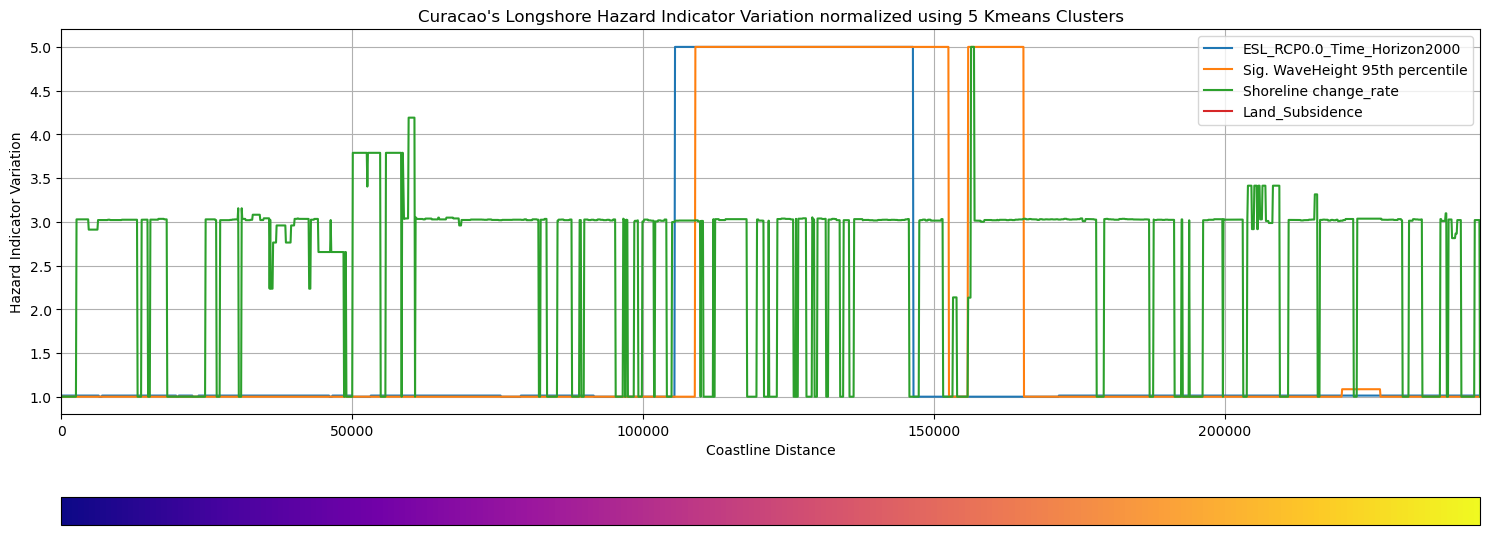

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import plotly.express as px

# Convert Plotly's 'plasma' colormap to Matplotlib's colormap
plasma_colors = px.colors.sequential.Plasma
plasma_cmap = mcolors.LinearSegmentedColormap.from_list("Plasma", plasma_colors)

# plt.figure(figsize=(15, 6))

columns_to_scale = circle_center.columns[2:-1]  # Starting from the third column to the end
# circle_center_scaled = circle_center.dropna().copy()

# Select numerical columns only not geometry
numeric_columns = circle_center.select_dtypes(include=np.number)

# Replace NaN values with the minimum value of each respective column
circle_center_filled = circle_center.copy()
circle_center_filled[numeric_columns.columns] = numeric_columns.fillna(numeric_columns.min())

# Make a copy to avoid modifying the original DataFrame
circle_center_scaled = circle_center_filled.copy()



# Perform KMeans clustering-based scaling
for column in columns_to_scale:
    # Fit KMeans model
    kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # Explicitly set n_init

    #Skip if no data is sampled
    if np.isnan(circle_center_scaled[[column]].iloc[:, 0]).all():
        print("no sampled points for " + column)
        continue
    kmeans.fit(circle_center_scaled[[column]])


        
    # Sort to ensure maximum value occurs
    kmeans.cluster_centers_ = np.sort(kmeans.cluster_centers_, axis=0)

    print( kmeans.cluster_centers_)

    # Transform values based on cluster centroids
    scaled_values = kmeans.transform(circle_center_scaled[[column]])
    print(scaled_values)
    scaled_values = 1 + (scaled_values -scaled_values.min()) / (scaled_values.max() - scaled_values.min()) * 4
    print(scaled_values)
    circle_center_scaled[column] = scaled_values

# Create figure and grid layout with two subplots
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot the line graph using Seaborn with the 'plasma' colormap
for column in circle_center_scaled.columns[2:-1]:
    sns.lineplot(data=circle_center_scaled, x='distance', y=column, label=column, ax=ax1, palette=plasma_cmap)

# Add color bar along the x-axis
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=plasma_cmap), ax=ax1, orientation='horizontal', aspect=50)
cbar.set_ticks([])  # Remove color bar tick labels
cbar.set_label('')  # Remove color bar label

# Set title and labels for the line graph
ax1.set_title("Curacao's Longshore Hazard Indicator Variation normalized using 5 Kmeans Clusters")
ax1.set_xlabel('Coastline Distance')
ax1.set_ylabel('Hazard Indicator Variation')
ax1.grid(True)
ax1.set_xlim(circle_center_scaled['distance'].min(), circle_center_scaled['distance'].max())

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [27]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.cluster import KMeans
# import numpy as np

# plt.figure(figsize=(10, 6))

# columns_to_scale = circle_center.columns[3:]  # Starting from the third column to the end

# # Perform KMeans clustering-based scaling
# for column in columns_to_scale:
#     # Fit KMeans model
#     kmeans = KMeans(n_clusters=5, random_state=42)
#     kmeans.fit(circle_center[[column]])
    
#     # Transform values based on cluster centroids
#     scaled_values = kmeans.transform(circle_center[[column]])
#     scaled_values = 1 + (scaled_values - scaled_values.min()) / (scaled_values.max() - scaled_values.min()) * 4
    
#     # Round scaled values to the nearest integer
#     scaled_values = np.round(scaled_values).astype(int)
    
#     circle_center[column] = scaled_values

# # Plotting the line graph using Seaborn
# for column in circle_center.columns[3:]:
#     sns.lineplot(data=circle_center, x='distance', y=column, label=column, marker="o",linewidth=0, markeredgewidth=0,markersize=3)

# plt.title(f'Curacao Indicator Variation Starting from {circle_center["geometry"][0]}')
# plt.xlabel('Coastline Distance')
# plt.ylabel('Indicator Level')
# plt.grid(True)
# plt.show()
